In [1]:
# importações necessarias

import pandas as pd                                          # manipulação de dados
import numpy as np                                           # calculos numericos
import matplotlib.pylab as plt                               # graficos
from datetime import datetime                                # manipulação de datas
from statsmodels.tsa.seasonal import seasonal_decompose      # decomposição de series temporais
from pmdarima.arima import auto_arima                        # algoritmo ARIMA para series temporais

# ignore warning
import warnings                                              # iginora os warnings
warnings.filterwarnings('ignore')

In [2]:
# carregando base de dados

dataset = pd.read_csv('./data/AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# carregamento com configurações para trabalhar com series temporais

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('./data/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)

In [4]:
# visualização após tratamento no carregamento

dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# serie temporal

time_series = dataset['#Passengers']

In [6]:
# serie temporal

time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [8]:
# seleção por periodo

time_series['1950-01-01':'1950-07-01']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [9]:
# seleção unica(ano/mes/dia)
# mes

time_series['1950-03']

Month
1950-03-01    141
Name: #Passengers, dtype: int64

In [10]:
# seleção unica(ano/mes/dia)
# ano

time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [11]:
# seleção periodo até data
# ano

time_series[:'1950']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [12]:
# indice do valor indice máximo

time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [13]:
# valor indice maximo

time_series['1960-12-01']

432

In [15]:
# seleção do valor no indice maximo

time_series[time_series.index.max()]

432

In [17]:
# valor indice # minimo

time_series[time_series.index.min()]

112

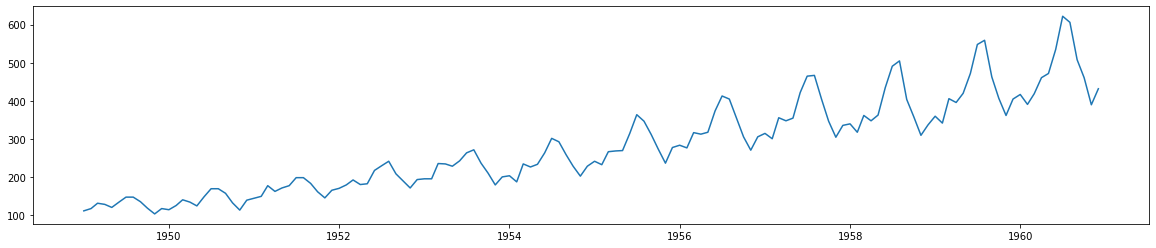

In [78]:
# grafico da serie temporal

plt.figure(figsize=(20,4))
plt.plot(time_series);

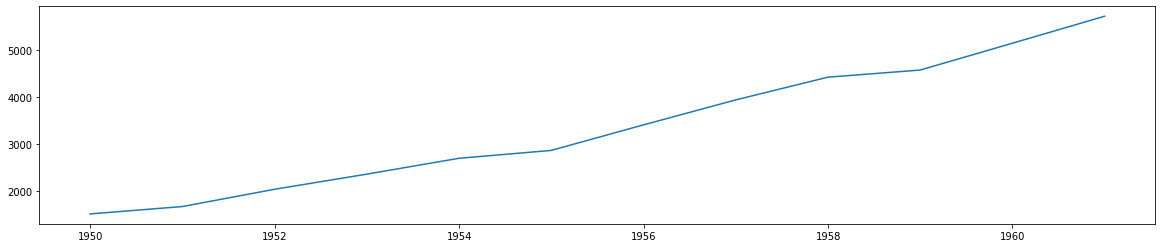

In [79]:
# somatório por ano

plt.figure(figsize=(20,4))
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano);

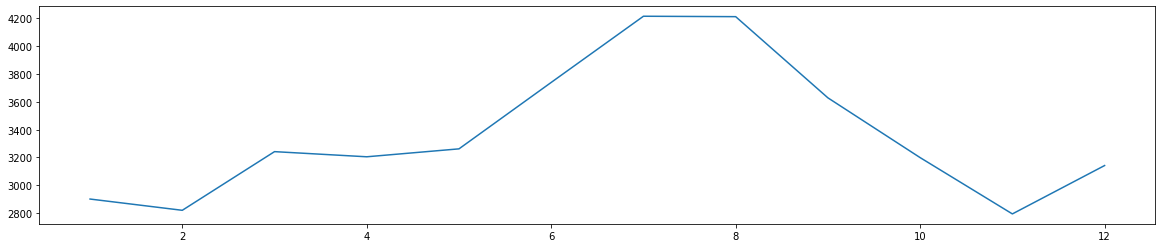

In [80]:
# seleção por mes

plt.figure(figsize=(20,4))
time_series_mes = time_series.groupby((lambda x: x.month)).sum()
plt.plot(time_series_mes);

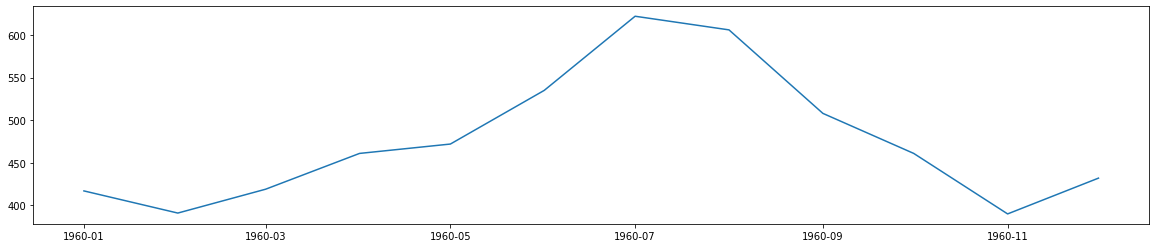

In [81]:
# apenas 1960

plt.figure(figsize=(20,4))
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas);

In [31]:
# decomposição series temporais

In [33]:
# decomposição da serie 

decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

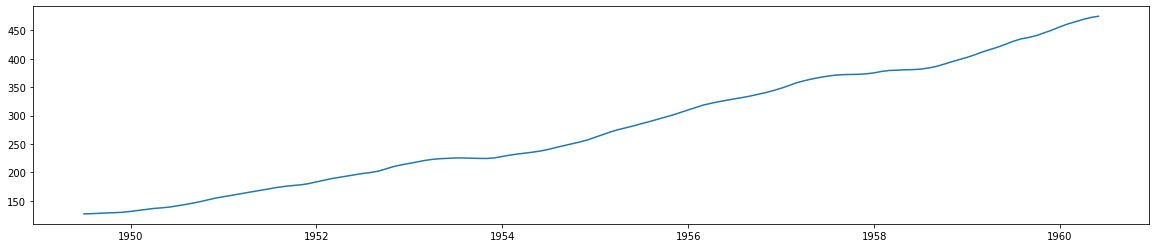

In [82]:
# tendencia da serie

plt.figure(figsize=(20,4))
plt.plot(tendencia);

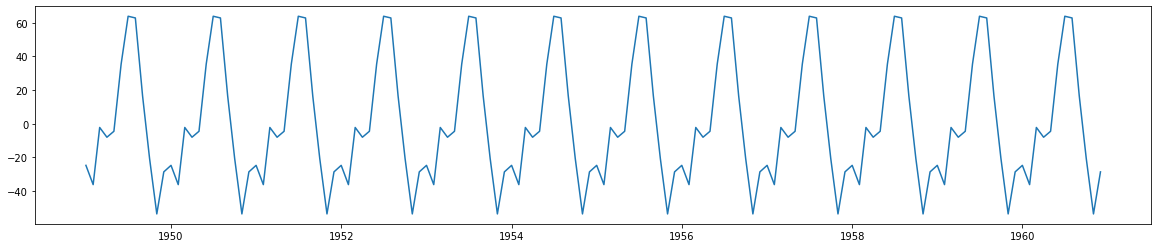

In [83]:
# sazonal da serie

plt.figure(figsize=(20,4))
plt.plot(sazonal);

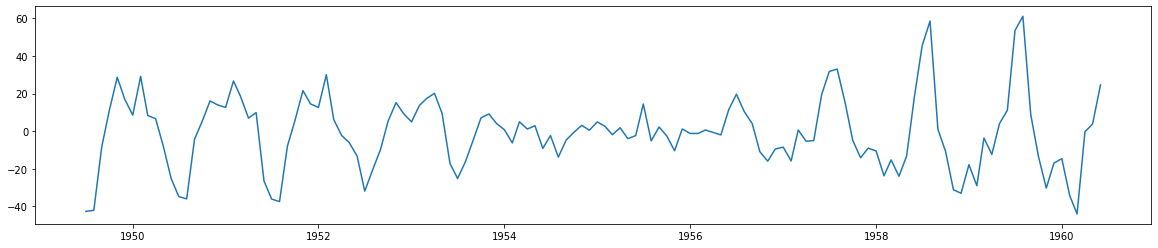

In [84]:
# residuos da serie

plt.figure(figsize=(20,4))
plt.plot(aleatorio);

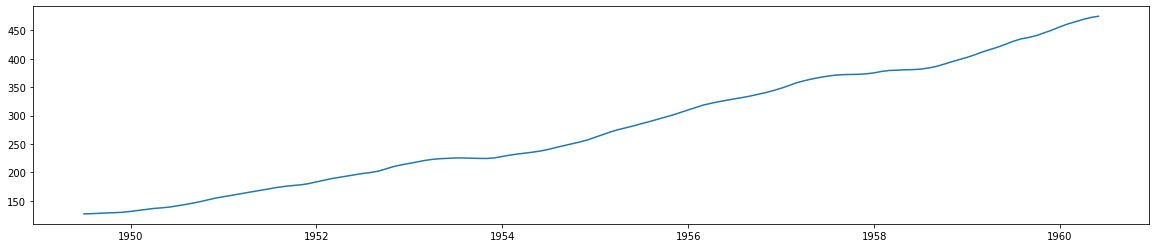

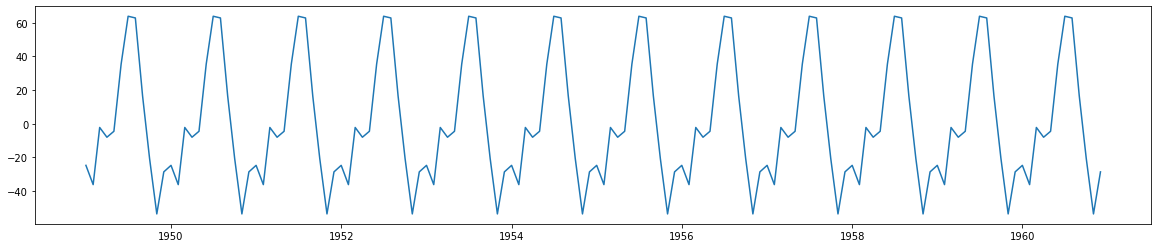

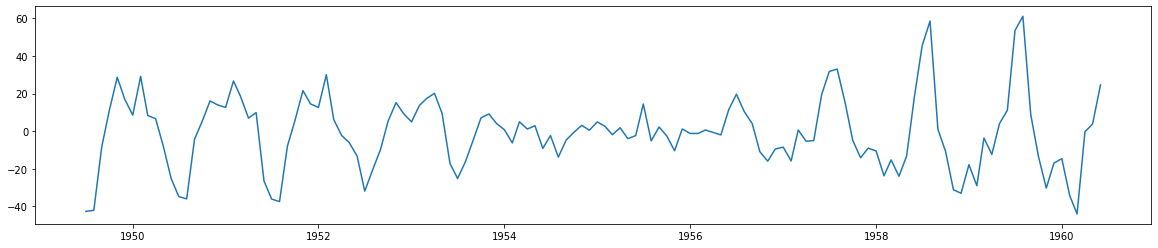

In [61]:
# grafico de todos

plt.figure(figsize=(20,4))
plt.plot(tendencia)
plt.show()

plt.figure(figsize=(20,4))
plt.plot(sazonal)
plt.show()

plt.figure(figsize=(20,4))
plt.plot(aleatorio)
plt.show()

In [63]:
# previsão com ARIMA

In [65]:
# parametros P, Q, D

model = auto_arima(time_series, order=(2, 1, 2))

In [69]:
# previsões para proximas 24 periodos (proximos 24 meses)

predictions = model.predict(n_periods=24)

In [70]:
# previsões

predictions

array([467.57383287, 490.49461728, 509.13699678, 492.55480941,
       495.30598323, 475.94780135, 476.33982961, 475.55213425,
       472.35383507, 483.88969357, 475.57022183, 485.92156707,
       479.13365452, 480.98746031, 482.22142361, 476.21105462,
       483.94284023, 475.84738746, 482.79428912, 479.01199218,
       479.51867017, 482.44948133, 476.97398218, 483.51104982])

In [ ]:
# grafico de previsões

In [71]:
len(time_series)

144

In [72]:
# separação da base em treino

train = time_series[:130]
train.shape

(130,)

In [73]:
# visualização do periodo da base de treino

train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [74]:
# separação da base em test

test = time_series[130:]
test.shape

(14,)

In [75]:
# periodo da base de test

test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [76]:
# parametros do algoritmo ARIMA

model2 = auto_arima(train, suppress_warnings=True)

In [77]:
# previsão do modelo em um DataFrame

prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passageiros_predictions']
prediction

,passageiros_predictions
Month,
1959-11-01,357.690515
1959-12-01,334.857456
1960-01-01,342.488598
1960-02-01,375.944535
1960-03-01,424.126291
1960-04-01,473.151448
1960-05-01,510.388385
1960-06-01,527.724250
1960-07-01,523.268339


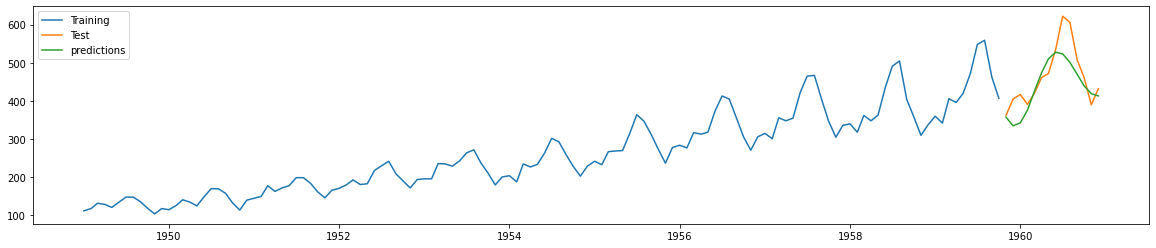

In [85]:
# grafico com previsões

plt.figure(figsize=(20,4))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='predictions')
plt.legend()
plt.show();